# Нотбук с EDA по данным

Основная задача - построить сервис, который может прогнозировать ЗП, основываясь на данных по профессии, региону размещения, графику работы и другим данным.

# Данные по вакансиям

In [54]:
!pip install matplotlib pandas seaborn scipy -q


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
sns.set_theme(style="whitegrid")

In [4]:
plt.style.use('ggplot')

In [5]:
DATA_FOLDER = os.path.join('../data')

In [6]:
data = pd.read_csv('../data/data_vacancies.csv')
data = data.drop('salary_pay_type', axis=1)

# Состав данных

In [11]:
data.columns

Index(['id', 'custom_position', 'schedule', 'salary_from', 'salary_to',
       'offer_education_id', 'education_name', 'education_is_base',
       'education_order_num', 'city_id', 'list_regions', 'work_skills',
       'tags_id'],
      dtype='object')

In [37]:
data.describe(include='all').T[['count', 'unique', 'mean']]

,count,unique,mean
id,19489.0,NaN,48505170.910411
custom_position,19489,7023,NaN
schedule,19489,6,NaN
salary_from,19489.0,NaN,58869.138848
salary_to,19489.0,NaN,88490.883935
offer_education_id,19489.0,NaN,0.351429
education_name,19489,5,NaN
education_is_base,19489,1,NaN
education_order_num,19489.0,NaN,2.474473
city_id,19489.0,NaN,22.559495


In [7]:
data.isna().sum()

id                        0
custom_position           0
schedule                  0
salary_from               0
salary_to                 0
offer_education_id        0
education_name            0
education_is_base         0
education_order_num       0
city_id                   0
list_regions              0
work_skills               0
tags_id                5999
dtype: int64

В данных нет пропусков за исключением tags_id - они заполняются редко и несут мало полезной информации

# Профессии

In [9]:

top20_profs = data['custom_position'].value_counts(dropna=False).nlargest(20)

top20_profs


custom_position
Продавец-кассир                                                     409
Менеджер по продажам                                                290
Продавец-консультант                                                238
Курьер                                                              193
Охранник                                                            134
Повар                                                               130
Разнорабочий                                                        127
Водитель по доставке документов                                     118
Грузчик                                                             118
Комплектовщик                                                       112
Работник торгового зала                                             105
Продавец                                                             96
Кладовщик                                                            96
Менеджер по работе с клиентами                  

## Топ-20 профессий в больших городах

In [73]:
data[data['city_id'] == 1]['custom_position'].value_counts(dropna=False).nlargest(20)

custom_position
Менеджер по продажам                                                                       179
Продавец-кассир                                                                            166
Курьер                                                                                     123
Продавец-консультант                                                                       115
Повар                                                                                       86
Оператор входящих звонков                                                                   80
Копирайтер                                                                                  72
Контент-менеджер                                                                            65
Менеджер социальных сетей                                                                   58
Работник торгового зала                                                                     55
Помощник копирайтера              

In [74]:
data[data['city_id'] == 2]['custom_position'].value_counts(dropna=False).nlargest(20)

custom_position
Продавец-кассир                   67
Менеджер по продажам              50
Продавец-консультант              44
Охранник                          44
Курьер                            42
Домработница приходящая           35
Уборщик, Уборщица                 28
Разнорабочий                      26
Кладовщик                         26
Продавец                          21
Уборщик/Уборщица                  21
Работник торгового зала           19
Грузчик                           18
Менеджер по работе с клиентами    18
Сборщик интернет-заказов          17
Бариста                           17
Заместитель директора магазина    15
Заправщик АЗС                     15
Автомеханик-автослесарь           15
Электромонтажник                  15
Name: count, dtype: int64

Больше всего в датасете профессий, связанных с розичной торговлей, также значительную долю занимают роли, связанные с продажей и поддержкой пользователей. 

Распределение в больших городах соответствует распределению позиций в целом по датасету.

# Зарплаты

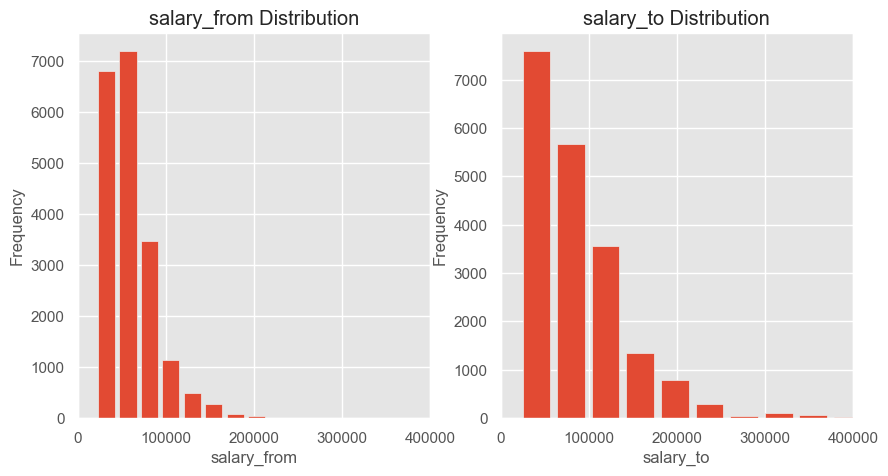

In [45]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
data['salary_from'].plot(kind='hist', bins=30, rwidth=0.8, title='salary_from Distribution')
plt.xlabel('salary_from')
plt.xlim(0,400000)

plt.subplot(1, 2, 2)
data['salary_to'].plot(kind='hist', bins=30, rwidth=0.8, title='salary_to Distribution')
plt.xlabel('salary_to')
plt.xlim(0,400000)

plt.show()

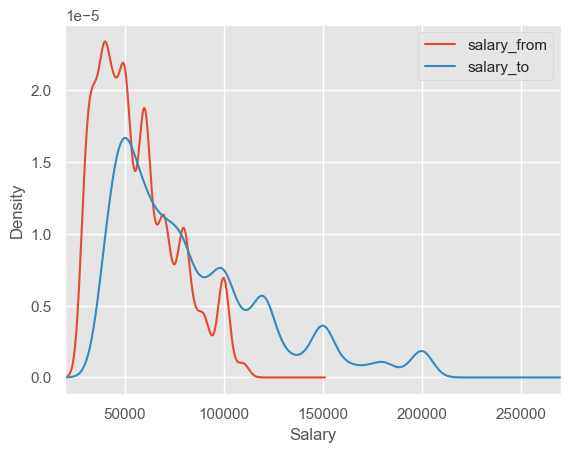

In [61]:
remove_percentage = 5
lower_percentile = np.percentile(data['salary_from'], remove_percentage)
upper_percentile = np.percentile(data['salary_from'], 100 - remove_percentage)

filtered_data_from = data['salary_from'][(data['salary_from'] >= lower_percentile) & (data['salary_from'] <= upper_percentile)]

filtered_data_from.plot(kind='density')

lower_percentile = np.percentile(data['salary_to'], remove_percentage)
upper_percentile = np.percentile(data['salary_to'], 100 - remove_percentage)
filtered_data_to = data['salary_to'][(data['salary_to'] >= lower_percentile) & (data['salary_to'] <= upper_percentile)]

filtered_data_to.plot(kind='density')
plt.xlim(20000, 270000)
plt.legend()
plt.xlabel('Salary')

plt.show()

В данных в основном представлены "синие воротнички", данных с высокими зарплатами мало, в основном зп до 100 тысяч.
Диапазон зарплат в salary_to шире, чем в salary_from.

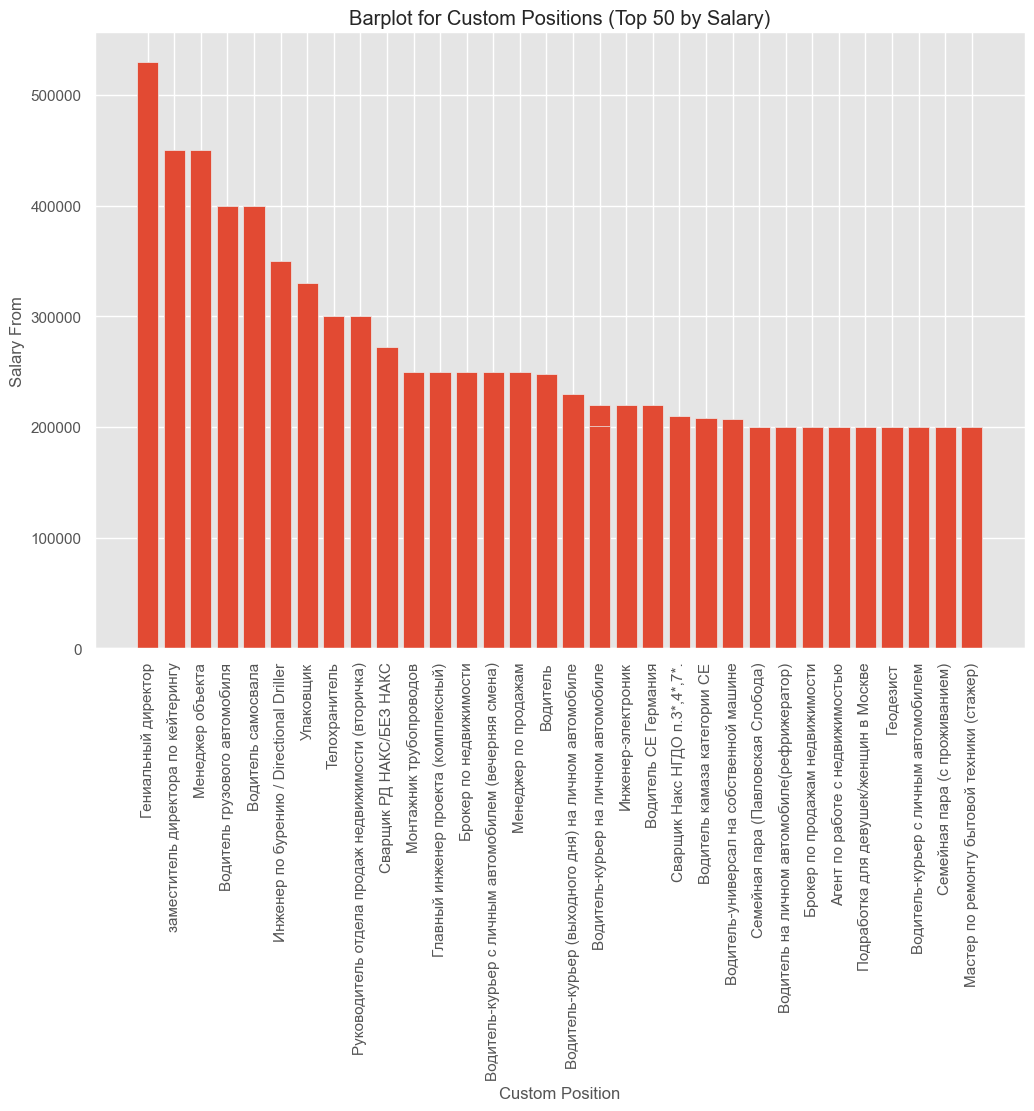

In [68]:
sorted_data = data[~data['custom_position'].str.lower().str.contains("бригада")].sort_values(by='salary_from',
                                                                                             ascending=False)

top_50_data = sorted_data.head(50)

plt.figure(figsize=(12, 8))
plt.bar(top_50_data['custom_position'], top_50_data['salary_from'])

plt.title('Barplot for Custom Positions (Top 50 by Salary)')
plt.xlabel('Custom Position')
plt.ylabel('Salary From')
plt.xticks(rotation=90)
plt.grid(True)

plt.show()

Наибольшие зарплаты в датасете у менеджмента (директоров, менеджеров), затем идут водители грузового транспорта и другие специалисты.

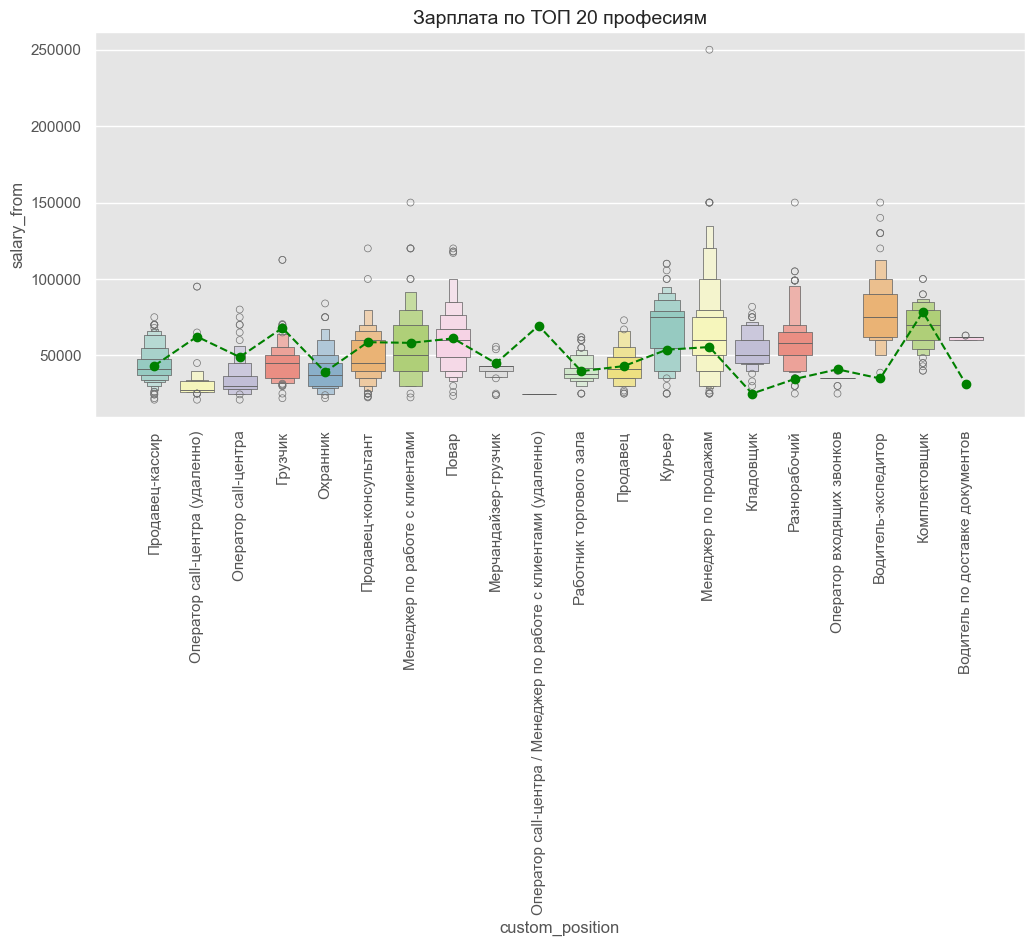

In [10]:
# top20_profs = data['salary_from'].sort_values(ascending=False).head(20)

_df = data[data['custom_position'].isin(top20_profs.index)]


profession_ranking = list(top20_profs.index)
_df = _df.sort_values('salary_from')

f, ax = plt.subplots(figsize=(12, 5))
ax = sns.boxenplot(x="custom_position", y="salary_from",
                   color="gray", hue="custom_position", palette="Set3",
                   width_method="linear", data=_df, linewidth=0.5)

ax.tick_params(axis='x', rotation=90)
ax.set_title("Зарплата по ТОП 20 професиям", fontsize=14)

means = _df.groupby("custom_position")["salary_from"].mean().loc[profession_ranking]
_ = plt.plot(range(len(profession_ranking)), means, marker="o", color="green", markersize=6, linestyle="--")

# Другое

## Навыки

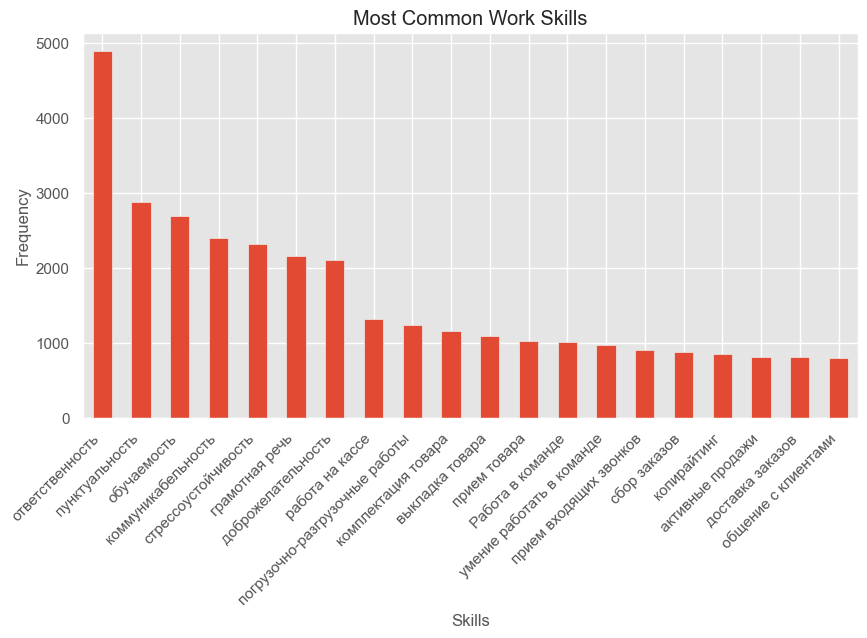

In [18]:
skills = data['work_skills'].apply(eval).explode()
skills.value_counts().sort_values(ascending=False)[0:20].plot(kind='bar', figsize=(10, 5))
plt.title('Most Common Work Skills')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

Самые популярные навыки - soft skills, присущие каждому человеку. Затем идут более специфичные навыки для кассиров, мерчендайзеров, курьеров и тд.

## График работы

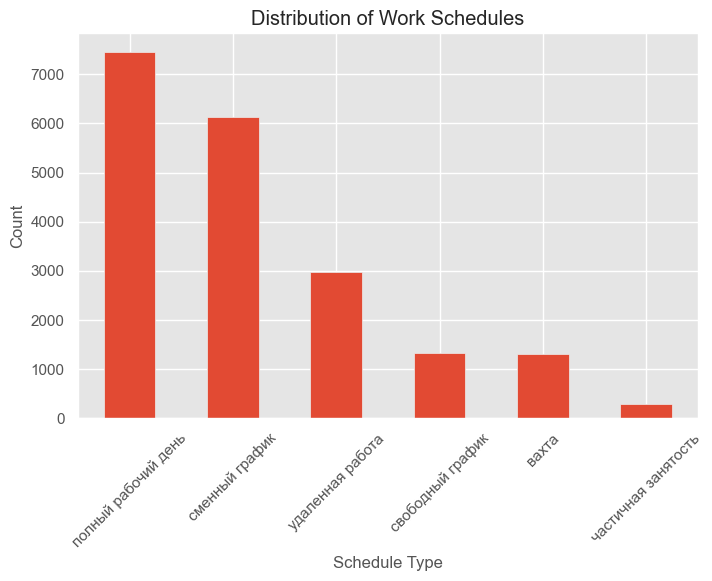

In [19]:
plt.figure(figsize=(8, 5))
data['schedule'].value_counts().plot(kind='bar')
plt.title('Distribution of Work Schedules')
plt.xlabel('Schedule Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Большинство вакансий рассчитаны на полный рабочий день или по сменам, что связано с необходимостью очной работы

## Образование

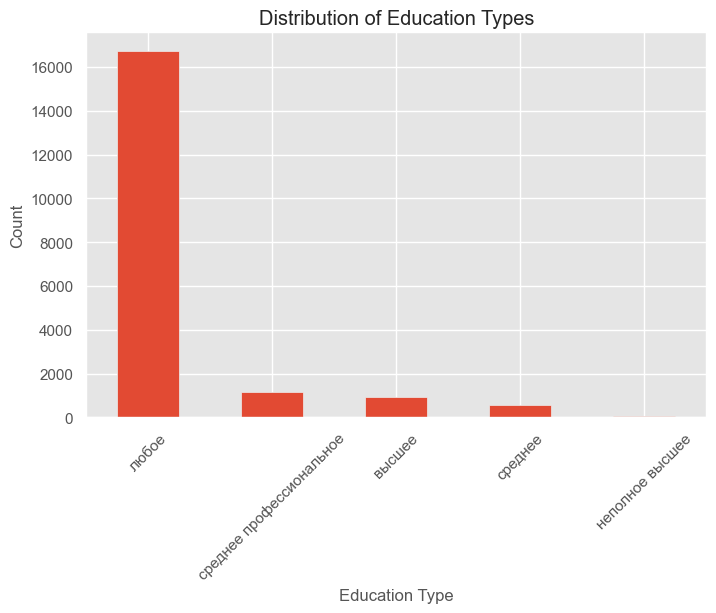

In [20]:
plt.figure(figsize=(8, 5))
data['education_name'].value_counts().plot(kind='bar')
plt.title('Distribution of Education Types')
plt.xlabel('Education Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [21]:
data['education_is_base'].value_counts()

education_is_base
True    19489
Name: count, dtype: int64

В большинстве вакансий нет жестких требований к образованию

## Города и регионы

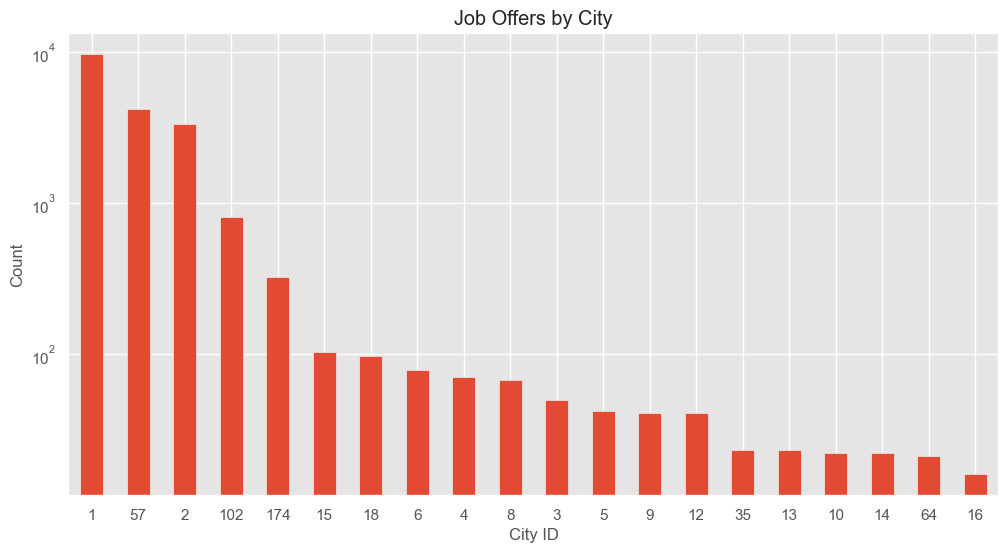

In [22]:
plt.figure(figsize=(12, 6))
data['city_id'].value_counts().sort_values(ascending=False)[0:20].plot(kind='bar', logy=True)
plt.title('Job Offers by City')
plt.xlabel('City ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [23]:
data.city_id.value_counts().head(5)

city_id
1      9717
57     4210
2      3357
102     807
174     324
Name: count, dtype: int64

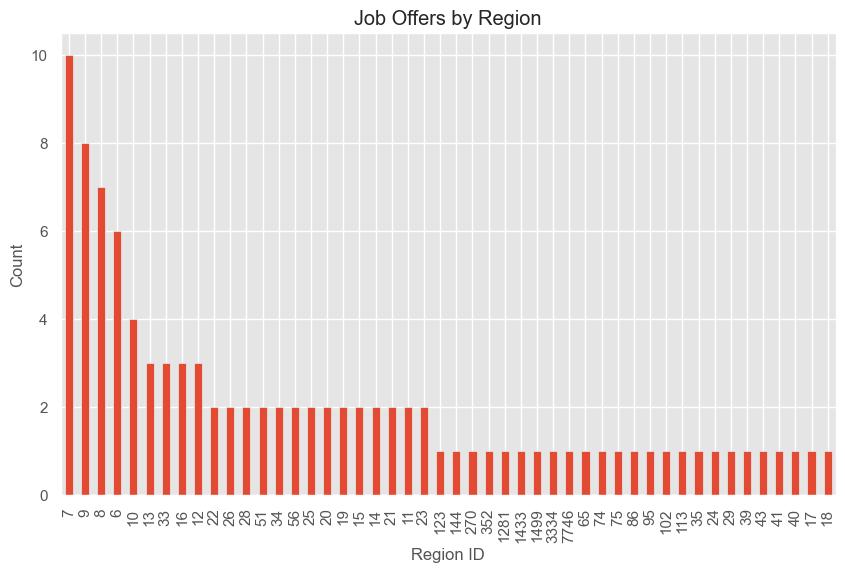

In [31]:
plt.figure(figsize=(10, 6))
regions = data['list_regions'].explode().value_counts().head(100)
regions.value_counts().plot(kind='bar')
plt.title('Job Offers by Region')
plt.xlabel('Region ID')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Видно, что больше всего вакансий приходится на столицы, затем идут города-миллионники, а затем и другие регионы